# EMA of Curacao EV Vensim Model
In this Jupyter Notebook:
1. Setting up experiments and running iterations;
2. Initial Exploration: Scatterplots & Correlation matrices, line plots;
3. Clustering of runs based on behaviour;
4. Scenario Discovery: PRIM * Dimensional Stacking;
5. Sensitivity Analyses: Feature Scoring & Sobol Global SA.

In [1]:
# check library versions
import ema_workbench, numpy as np, sys
print("EMA version:", ema_workbench.__version__)
print("EMA path   :", ema_workbench.__file__)
print("NumPy      :", np.__version__)
print(sys.executable)

EMA version: 2.5.3
EMA path   : c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\__init__.py
NumPy      : 2.3.3
c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\python.exe


In [2]:
# Import necessary libraries
from ema_workbench import (
    RealParameter,
    IntegerParameter,
    CategoricalParameter,
    TimeSeriesOutcome,
    ema_logging,
    perform_experiments,
)
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench import save_results, load_results
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import prim
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import plotting

import matplotlib.pyplot as plt

import seaborn as sns

c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\connectors\__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\connectors\__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\analysis\prim.py:32: ImportWarning: altair based interactive inspection not available
  warnings.warn("altair based interactive inspection not available", ImportWarning)


In [ ]:
# Fix for older numpy versions that do not have np.NAN
import numpy as np
if not hasattr(np, "NAN"):
    np.NAN = np.nan

## 1. Set up Experiments

In [6]:
# Set up and run the experiments
if __name__ == "__main__": 
    # turn on logging
    ema_logging.log_to_stderr(ema_logging.INFO) 

    # instantiate a model
    wd = "./model_files/" # adjust this path to load different version of model
    vensim_model = VensimModel("evmodel", wd=wd, model_file="14_10_einde_dag_added_metrics.vpmx")
    # "14_10_einde_dag.vpmx" ; "14_10_einde_dag_added_metrics.vpmx"

    vensim_model.uncertainties = [

        # Initial number of cars
        IntegerParameter('"initial cars 0-5"[FossilVehicle]', 8000, 12000),
        IntegerParameter('"initial cars 0-5"[ElectricVehicle]', 1000, 1500),

        IntegerParameter('"initial cars 5-10"[FossilVehicle]', 9000, 13000),
        IntegerParameter('"initial cars 5-10"[ElectricVehicle]', 500, 1000),

        IntegerParameter('"initial cars 10-15"[FossilVehicle]', 9000, 12000),
        IntegerParameter('"initial cars 10-15"[ElectricVehicle]', 200, 500),

        IntegerParameter('"initial cars 15-20"[FossilVehicle]', 8000, 11000),
        IntegerParameter('"initial cars 15-20"[ElectricVehicle]', 0, 5),

        IntegerParameter('"initial cars >20"[FossilVehicle]', 10000, 13000),
        IntegerParameter('"initial cars >20"[ElectricVehicle]', 5, 10),
    ]

    vensim_model.outcomes = [
        TimeSeriesOutcome("Number of EVs"),
        TimeSeriesOutcome("Total CO2 emissions cars[FossilVehicle]"),
        TimeSeriesOutcome("Accumulated CO2 Emissions"),
        ]

    results = perform_experiments(vensim_model, 100)

    # split results into experiments and outcomes
    experiments, outcomes = results

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments


100%|████████████████████████████████████████| 100/100 [00:03<00:00, 26.32it/s]
[MainProcess/INFO] experiments finished


#### Save/load results [comment out if not necessary]

In [ ]:
# Save results  
#save_results(results, "./results/ev_results.tar.gz")

c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\em_framework\outcomes.py:541: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
[MainProcess/INFO] results saved successfully to c:\Users\Amber Rozenberg\Documents\0. Julia\Curacao EV\curacao_ev\results\ev_results.tar.gz


In [ ]:
# Load results
#experiments, outcomes = load_results("./results/ev_results.tar.gz")

[MainProcess/INFO] results loaded successfully from c:\Users\Amber Rozenberg\Documents\0. Julia\Curacao EV\curacao_ev\results\ev_results.tar.gz


## 2. Initial Exploration

### Pairplot

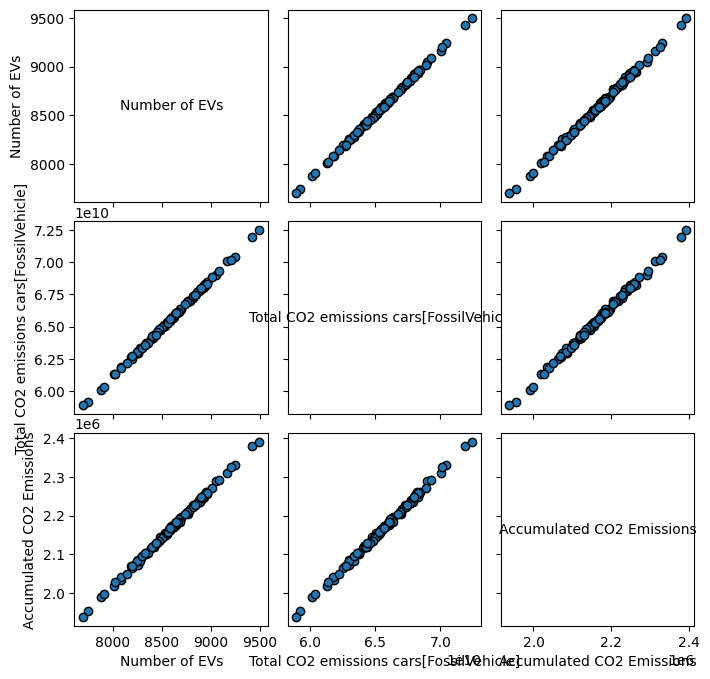

In [7]:
fig, axes = pairs_plotting.pairs_scatter(
    experiments, outcomes, legend=False
)
fig.set_size_inches(8, 8)
plt.show()

### Correlation Matrix

In [ ]:
# Selecting the rows and columns so we can compare the outcomes with the uncertainties
bottom_4_rows_first_10_cols = correlation_matrix.tail(4).iloc[:, :19]

# Plot heatmap of the selected subset
plt.figure(figsize=(16, 8))
sns.heatmap(bottom_4_rows_first_10_cols,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

### Runs Overview

''

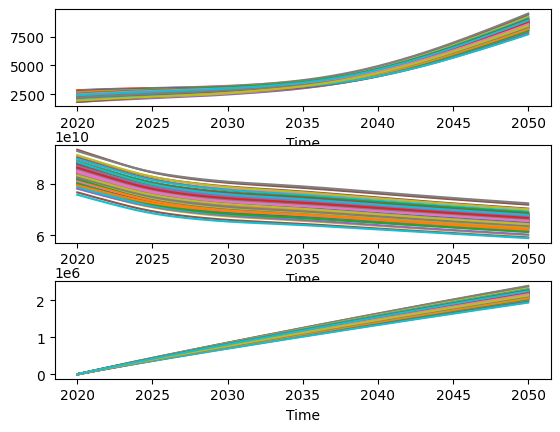

In [21]:
# plotting all lines
plotting.lines(experiments, outcomes, 
               outcomes_to_show=None, group_by=None, 
               grouping_specifiers=None, density='', 
               legend=True, titles=None, ylabels=None, 

               experiments_to_show=None, show_envelope=False, log=False)

;

''

<Figure size 640x480 with 0 Axes>

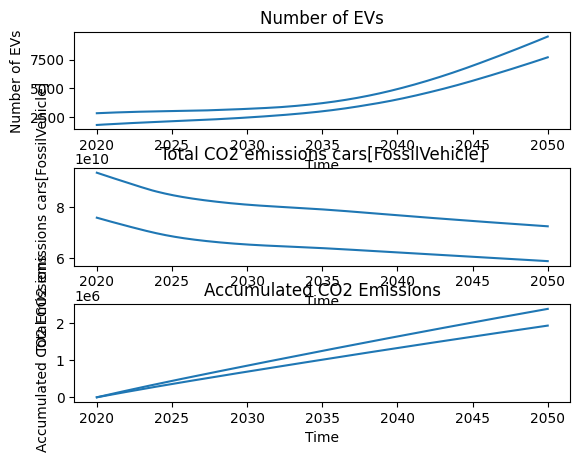

In [24]:
# envelope plot
plt.tight_layout()

plotting.envelopes(experiments, outcomes,
                    outcomes_to_show=None, 
                    group_by=None, grouping_specifiers=None, 
                    density=None, fill=False, legend=True, 
                    titles={}, ylabels={}, log=False)
;

[MainProcess/WARNING] error in determine_kde: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
c:\Users\Amber Rozenberg\anaconda3\envs\cura_ev_env\Lib\site-packages\ema_workbench\analysis\plotting_util.py:369: RuntimeWarning: invalid value encountered in divide
  kde_x = kde_x / np.max(kde_x)


''

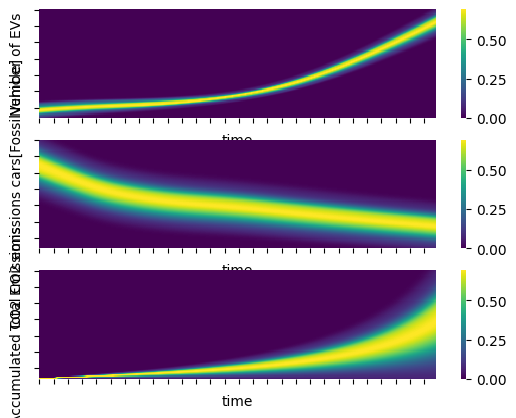

In [25]:
# KDE over time (30 seconds to run)
plotting.kde_over_time(experiments, outcomes, 
                       outcomes_to_show=None, 
                       group_by=None, grouping_specifiers=None, 
                       colormap='viridis', log=True)

;

## 3. Clustering Runs

In [18]:
# PLACEHOLDER

## 4. Scenario Discovery

### Patient-Rule Induction Method (PRIM)

In [ ]:
# use PRIM to find scenarios with less than 8000 EVs after 30 years
x = experiments

ev_ts = outcomes["Number of EVs"]
final_evs = ev_ts[:, -1] # pick the last time step (or the column == 30 if your columns are time labels)

y = final_evs < 8000 

In [39]:
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 100 points remaining, containing 4 cases of interest
[MainProcess/INFO] mean: 0.8, mass: 0.05, coverage: 1.0, density: 0.8 restricted_dimensions: 6


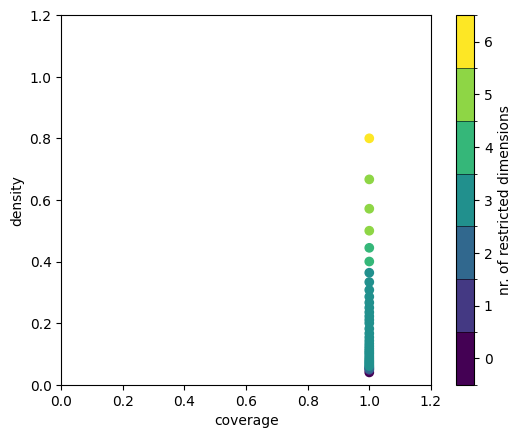

In [40]:
box1.show_tradeoff()
plt.show()

coverage     1.000000
density      0.057143
id           4.000000
k            4.000000
mass         0.700000
mean         0.057143
n           70.000000
res_dim      2.000000
Name: 4, dtype: float64

                                      box 4                            
                                        min     max  qp value  qp value
"initial cars 0-5"[ElectricVehicle]  1004.0  1413.0       NaN  0.437846
"initial cars >20"[ElectricVehicle]     6.0    10.0  0.437846       NaN



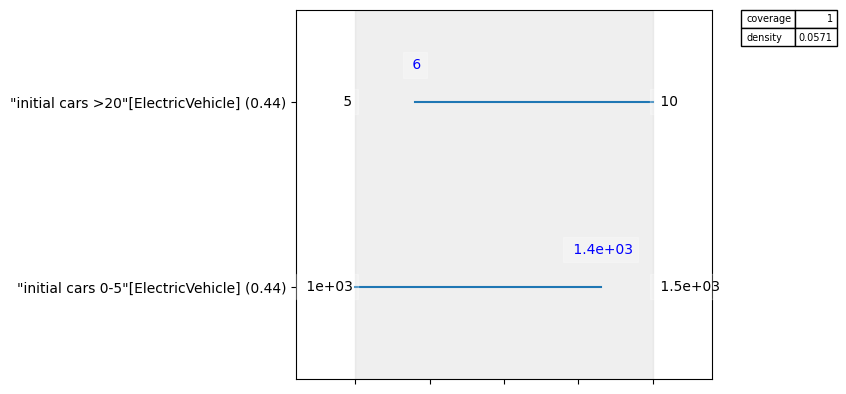

In [42]:
box1.inspect(4)
box1.inspect(4, style="graph")
plt.show()

''

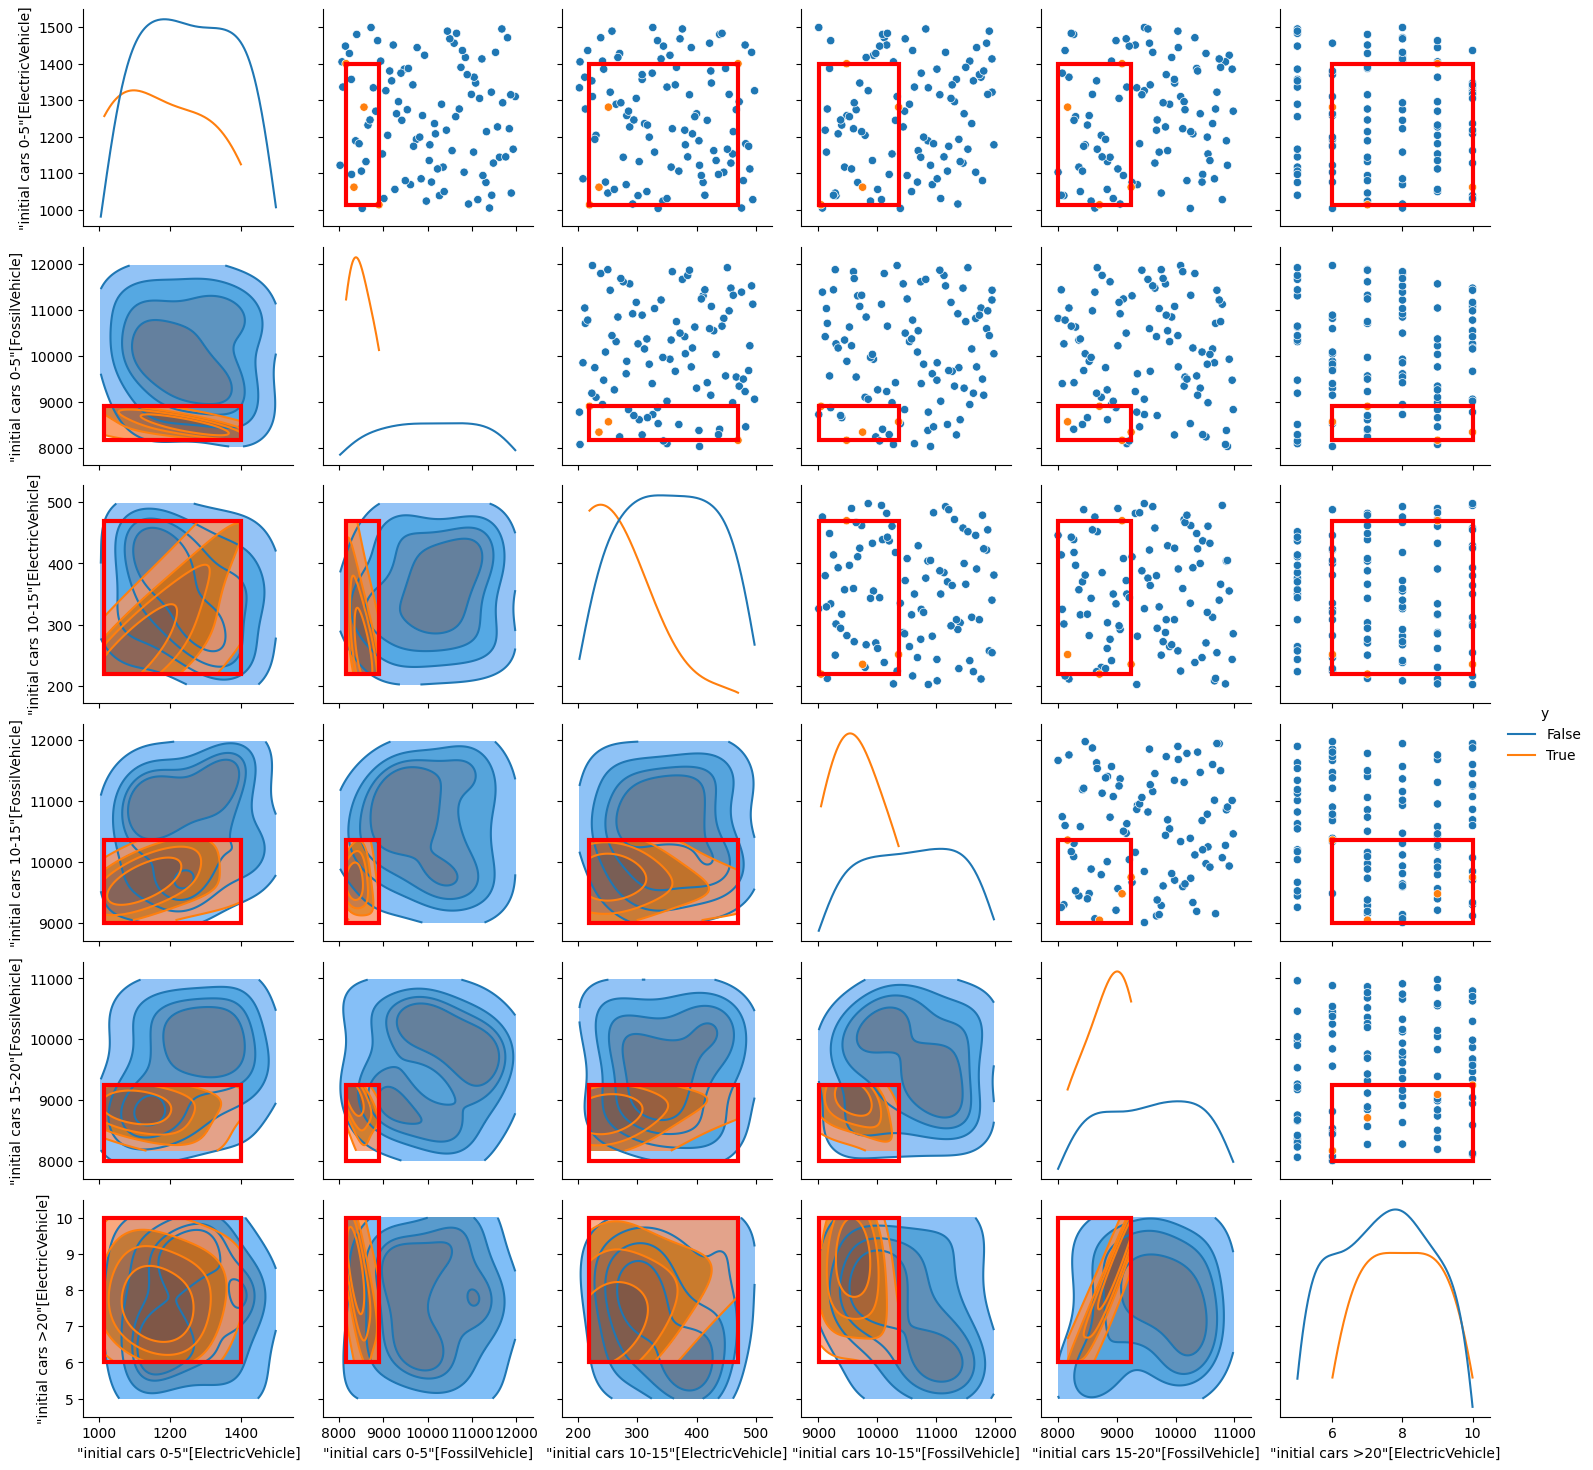

In [38]:
# Scatter plot of box boundaries
box1.show_pairs_scatter()        # visualize relationships inside/outside box
;

### Dimensional Stacking

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


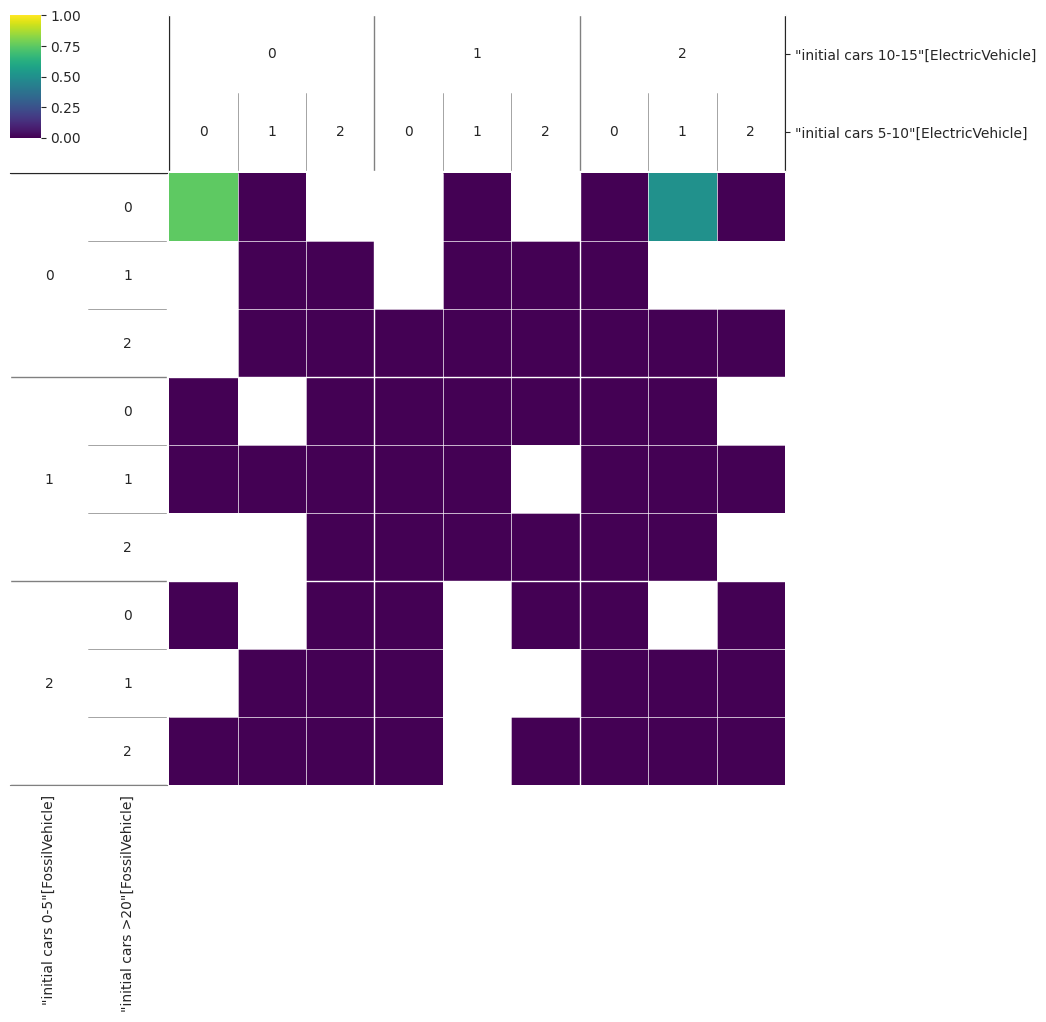

In [43]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = final_evs < 8000 
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

## 5. Sensitivity Analysis

### Feature Scoring

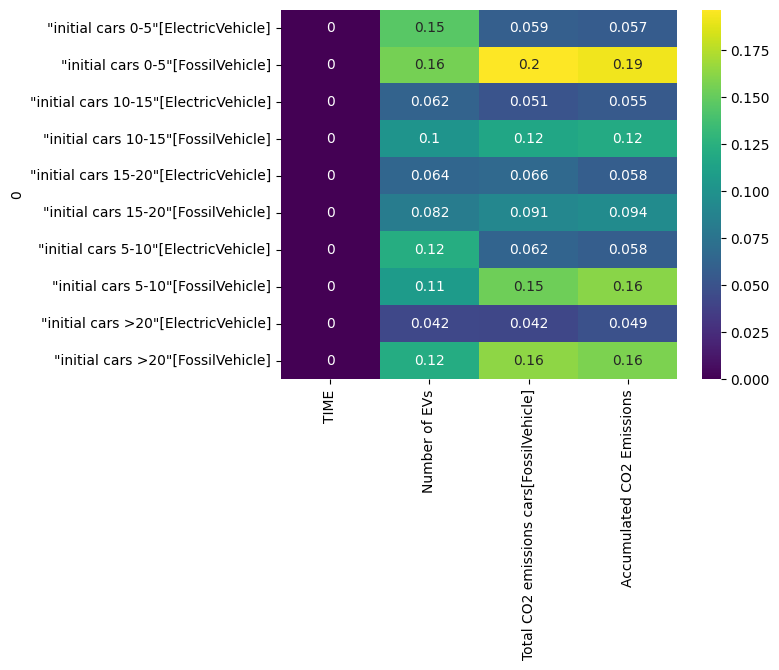

In [8]:
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

### Sobol Global SA

In [20]:
# PLACEHOLDER

### Plotting Line Graphs